In [33]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [239]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}
plt.rc('font', **font)

## Import dataset
dataset is originally prepared as text file, so following process is needed to convert txt file to csv file. The process includes collapsing blanks.

In [16]:
def collapseBlanks(original_path, saving_path):
    
    with open(original_path, 'r') as file :
         lines = file.readlines()
    
    for i, line in enumerate(lines):
        collapsed = ' '.join(line.split())
        lines[i] = lines[i].replace(line, collapsed)
        
    with open(saving_path, 'w') as file :
        for i in range(len(lines)-1):
            file.write(lines[i+1]+'\n')

In [17]:
collapseBlanks("./Anno/original/list_attr_img.txt", "./Anno/changed/list_attr_img.txt")
collapseBlanks("./Anno/original/list_attr_cloth.txt", "./Anno/changed/list_attr_cloth.txt")

with open("./Anno/changed/list_attr_cloth.txt", 'r') as file :
    filedata = file.read()
filedata = filedata.replace('attribute_type', ',attribute_type')
for attribute_type in range(1,6):
    filedata = filedata.replace(str(attribute_type), ','+str(attribute_type))

with open("./Anno/changed/list_attr_cloth.txt", 'w') as file :
    file.write(filedata)

In [18]:
collapseBlanks("./Anno/original/list_category_cloth.txt", "./Anno/changed/list_category_cloth.txt")
collapseBlanks("./Anno/original/list_category_img.txt", "./Anno/changed/list_category_img.txt")

# make dataframes and csv files

### 4 dataframes according to the given text files

In [19]:
df_attr_img = pd.read_csv('./Anno/changed/list_attr_img.txt', header = None, skiprows=1, sep = ' ')
df_attr_cloth = pd.read_csv('./Anno/changed/list_attr_cloth.txt', sep = ',') 
df_category_cloth = pd.read_csv('./Anno/changed/list_category_cloth.txt', sep = ' ')
df_category_img = pd.read_csv('./Anno/changed/list_category_img.txt',sep = ' ') #, index_col='image_name'

In [20]:
#inserting category_label to category_cloth
df_category_cloth.insert(0, 'category_label', range(1, len(df_category_cloth)+1))

In [21]:
df_category_cloth.head()

,category_label,category_name,category_type
0,1,Anorak,1
1,2,Blazer,1
2,3,Blouse,1
3,4,Bomber,1
4,5,Button-Down,1


In [26]:
df_category_img.head()

,image_name,category_label
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3


In [27]:
df_attr_cloth.head()

,attribute_name,attribute_type
0,a-line,3
1,abstract,1
2,abstract chevron,1
3,abstract chevron print,1
4,abstract diamond,1


In [30]:
df_attr_img.head()

,image_name,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [23]:
df_attr_img.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289222 entries, 0 to 289221
Data columns (total 1001 columns):
0       object
1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12      int64
13      int64
14      int64
15      int64
16      int64
17      int64
18      int64
19      int64
20      int64
21      int64
22      int64
23      int64
24      int64
25      int64
26      int64
27      int64
28      int64
29      int64
30      int64
31      int64
32      int64
33      int64
34      int64
35      int64
36      int64
37      int64
38      int64
39      int64
40      int64
41      int64
42      int64
43      int64
44      int64
45      int64
46      int64
47      int64
48      int64
49      int64
50      int64
51      int64
52      int64
53      int64
54      int64
55      int64
56      int64
57      int64
58      int64
59      int64
60      int64
61      int64
62      int64
63  

In [12]:
df_attr_cloth.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
attribute_name     1000 non-null object
attribute_type     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [13]:
df_category_cloth.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
category_label    50 non-null int32
category_name     50 non-null object
category_type     50 non-null int64
dtypes: int32(1), int64(1), object(1)
memory usage: 1.1+ KB


In [14]:
df_category_img.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289222 entries, 0 to 289221
Data columns (total 2 columns):
image_name        289222 non-null object
category_label    289222 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


### combining dataframes
+ Combining image and category name

In [7]:
df_category_combined = pd.merge(df_category_cloth, df_category_img)

In [8]:
df_category_combined.head()

,category_label,category_name,category_type,image_name
0,1,Anorak,1,img/Hooded_Cotton_Canvas_Anorak/img_00000001.jpg
1,1,Anorak,1,img/Hooded_Cotton_Canvas_Anorak/img_00000002.jpg
2,1,Anorak,1,img/Hooded_Cotton_Canvas_Anorak/img_00000003.jpg
3,1,Anorak,1,img/Hooded_Cotton_Canvas_Anorak/img_00000004.jpg
4,1,Anorak,1,img/Hooded_Cotton_Canvas_Anorak/img_00000005.jpg


+ Combining image and attribute name

In [153]:
lst_attr = df_attr_cloth['attribute_name ']
df_attr_img.columns = pd.Series(['image_name']).append(lst_attr,ignore_index=True)
df_attr_combined= df_attr_img

In [154]:
df_attr_combined.head()

,image_name,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,...,zeppelin,zig,zigzag,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


+ Combining attributes and category

In [31]:
df_attr_category_combined = pd.merge(df_attr_combined, df_category_combined)

In [32]:
df_attr_category_combined.head()

,image_name,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,...,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered,category_label,category_name,category_type
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,3,Blouse,1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,3,Blouse,1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,3,Blouse,1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,3,Blouse,1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,3,Blouse,1


+ export attr_combined.csv, category_combined.csv, attr_category_combined.csv

In [26]:
#attr_combined.csv
file_name = "attr_combined.csv"
df_attr_combined.to_csv("./Anno/changed/"+file_name, index=None)

In [ ]:
#category_combined.csv
file_name = "category_combined.csv"
df_category_combined.to_csv("./Anno/changed/"+file_name, index=None)

In [ ]:
#attr_category_combined.csv
file_name = "attr_category_combined.csv"
df_attr_category_combined.to_csv("./Anno/changed/"+file_name, index=None)

## Visualize

### attribute distribution(frequency)

In [35]:
attr_frequency = (df_attr_combined.iloc[:,1:] == 1).sum(axis=0)
attr_frequency_sort=attr_frequency.sort_values(ascending = False)

In [40]:
attr_frequency_sort

print                      37367
floral                     24188
lace                       20434
knit                       18498
sleeve                     17828
maxi                       15990
shirt                      14920
denim                      13178
striped                    11771
chiffon                    11735
crochet                     8987
stripe                      8591
sleeveless                  7987
summer                      7616
floral print                7560
fit                         7489
cotton                      7370
leather                     7334
faux                        7243
classic                     7184
graphic                     6933
pleated                     6755
red                         6717
long sleeve                 6656
embroidered                 6621
pink                        6569
printed                     6568
bodycon                     6419
crop                        6221
skater                      6205
          

### plot attribute count in descending order
plot whole attributes to analyze distribution

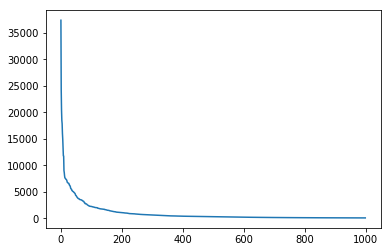

In [49]:
plt.plot([x for x in range(len(attr_frequency_sort))], [val for val in attr_frequency_sort])

plot top 50 number of attributes to analyze distribution

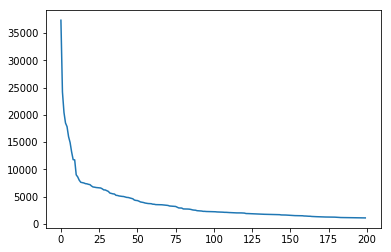

In [54]:
plt.plot([x for x in range(200)], [val for val in attr_frequency_sort[:200]])

plot top 50 attributes to analyze distribution

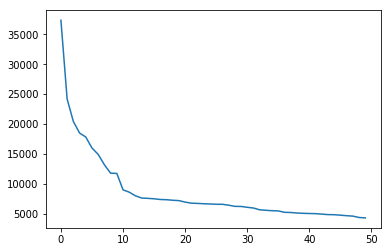

In [52]:
plt.plot([x for x in range(50)], [val for val in attr_frequency_sort[:50]])

plot top 20 attributes to analyze distribution

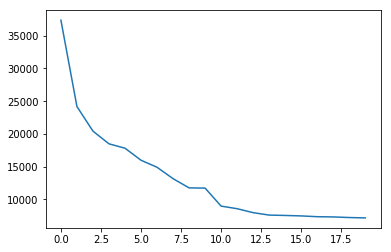

In [55]:
plt.plot([x for x in range(20)], [val for val in attr_frequency_sort[:20]])

plot histogram of top 20 attributes to analyze distribution

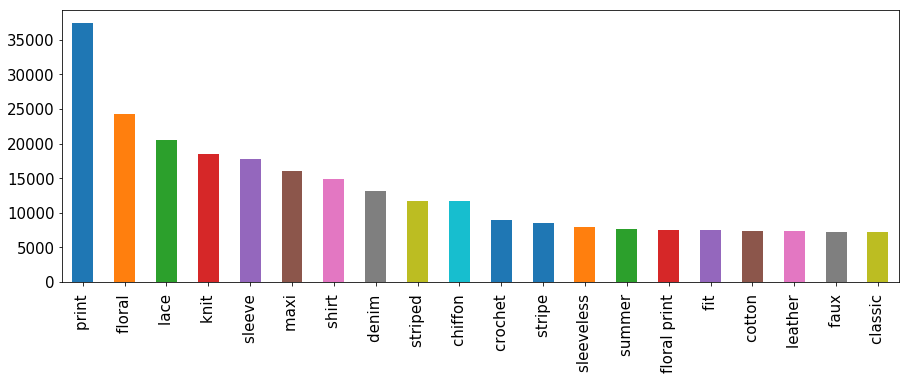

In [240]:
attr_frequency_sort[:20].plot(kind = 'bar', figsize=(15,5), fontsize = 15)

### category distribution(frequency)

In [41]:
category_frequency= df_category_combined.groupby(['category_name'])['image_name'].count()
category_frequency_sort = category_frequency.sort_values(ascending=False)

In [63]:
category_frequency_sort

category_name
Dress          72158
Tee            36887
Blouse         24557
Shorts         19666
Tank           15429
Skirt          14773
Cardigan       13311
Sweater        13123
Jacket         10467
Top            10078
Blazer          7495
Romper          7408
Jeans           7076
Jumpsuit        6153
Leggings        5013
Joggers         4416
Hoodie          4048
Sweatpants      3048
Kimono          2294
Coat            2120
Cutoffs         1669
Sweatshorts     1106
Poncho           791
Jersey           748
Henley           716
Parka            676
Jeggings         594
Chinos           527
Culottes         486
Trunks           386
Button-Down      330
Flannel          324
Bomber           309
Anorak           160
Robe             150
Turtleneck       146
Kaftan           126
Peacoat           97
Capris            77
Onesie            70
Caftan            54
Gauchos           49
Jodhpurs          45
Sarong            32
Coverup           17
Halter            17
Name: image_name, dt

### plot category count in descending order
plot whole categories to analyze distribution

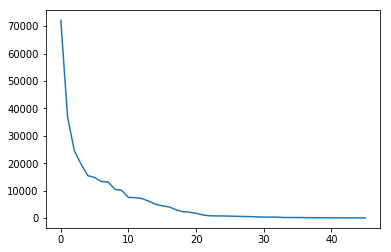

In [57]:
plt.plot([x for x in range(len(category_frequency_sort))], [val for val in category_frequency_sort])

plot top 20 categories to analyze distribution

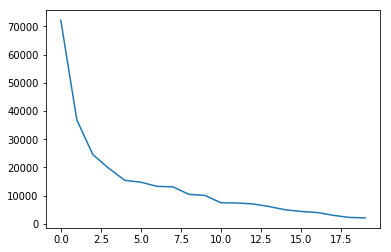

In [60]:
plt.plot([x for x in range(20)], [val for val in category_frequency_sort[:20]])

plot top 10 categories to analyze distribution

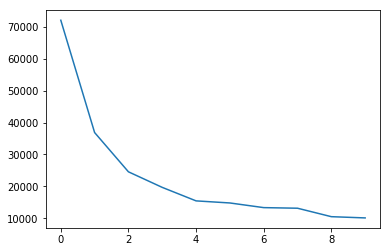

In [59]:
plt.plot([x for x in range(10)], [val for val in category_frequency_sort[:10]])

plot histogram of top 20 categories to analyze distribution

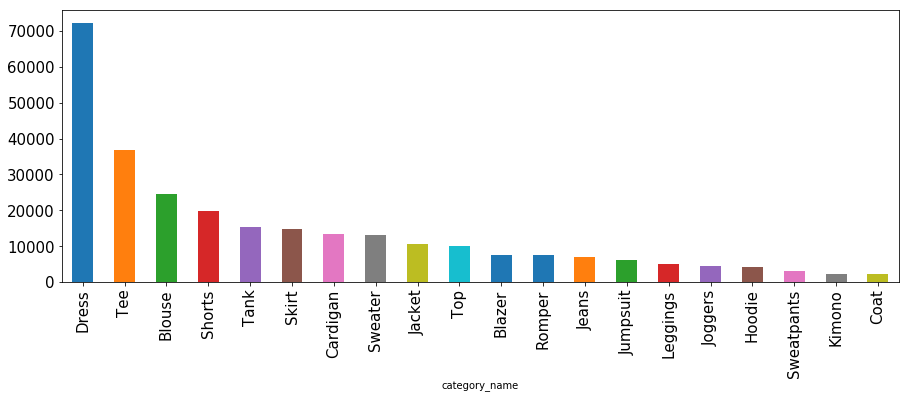

In [62]:
category_frequency_sort[:20].plot(kind = 'bar', figsize=(15,5), fontsize = 15)

## groupby attribute types

In [65]:
df_attr_cloth.groupby(df_attr_cloth.attribute_type).size()

attribute_type
1    156
2    218
3    180
4    216
5    230
dtype: int64

In [66]:
def df_attr_type(attr_type, i):

    df_attr_type = ('df_attr_'+attr_type)
    lst_attr_type = ('lst_attr_'+attr_type)
    attr_type_frequency = (attr_type+'_frequency')
    attr_type_frequency_sort = (attr_type+'_frequency_sort')
        
    df_attr_type = df_attr_cloth[(df_attr_cloth.attribute_type == i)]
        
    lst_attr_type = ['image_name']+ (df_attr_type['attribute_name '].values.tolist())
    df_attr_type = pd.DataFrame(df_attr_img, columns=lst_attr_type)
    attr_type_frequency = (df_attr_type.iloc[:,1:] == 1).sum(axis=0)
    attr_type_frequency_sort = attr_type_frequency.sort_values(ascending = False)
    
    return df_attr_type, lst_attr_type, attr_type_frequency, attr_type_frequency_sort

In [67]:
df_attr_texture, lst_attr_texture, attr_texture_frequency, attr_texture_frequency_sort = df_attr_type('texture', 1)
df_attr_fabric, lst_attr_fabric, attr_fabric_frequency, attr_fabric_frequency_sort = df_attr_type('fabric', 2)
df_attr_shape, lst_attr_shape, attr_shape_frequency, attr_shape_frequency_sort = df_attr_type('shape', 3)
df_attr_part, lst_attr_part, attr_part_frequency, attr_part_frequency_sort = df_attr_type('part', 4)
df_attr_style, lst_attr_style, attr_style_frequency, attr_style_frequency_sort = df_attr_type('style', 5)

### make csv file for each type

In [62]:
df_attr_texture.to_csv("./Anno/changed/attr_texture.csv", index=None)
df_attr_fabric.to_csv("./Anno/changed/attr_fabric.csv", index=None)
df_attr_shape.to_csv("./Anno/changed/attr_shape.csv", index=None)
df_attr_part.to_csv("./Anno/changed/attr_part.csv", index=None)
df_attr_style.to_csv("./Anno/changed/attr_style.csv", index=None)

#### texture

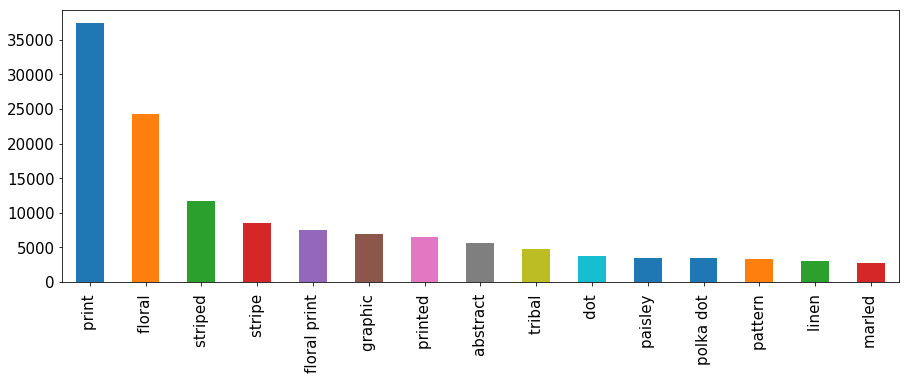

In [63]:
attr_texture_frequency_sort[:15].plot(kind = 'bar', figsize=(15,5), fontsize = 15)

#### fabric

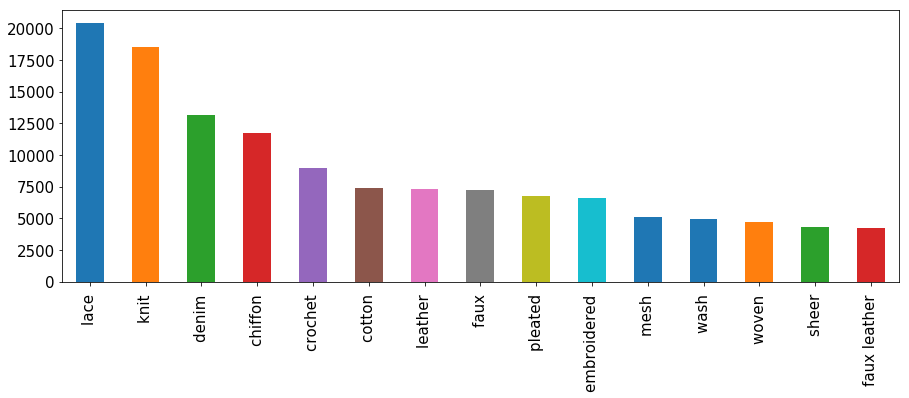

In [64]:
attr_fabric_frequency_sort[:15].plot(kind = 'bar', figsize=(15,5), fontsize = 15)

#### shape

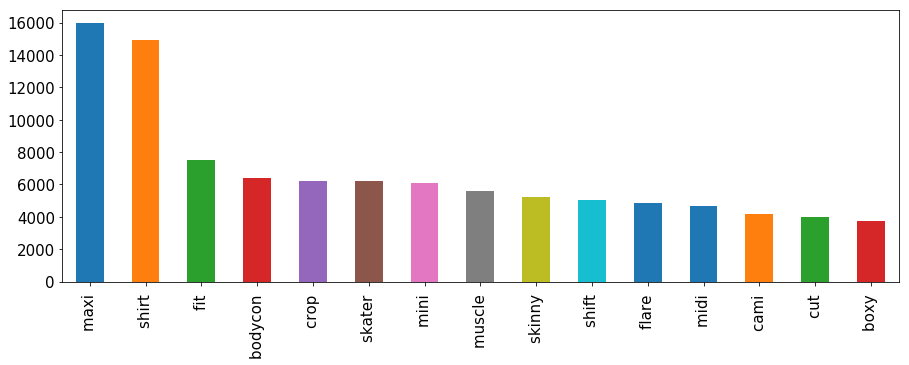

In [65]:
attr_shape_frequency_sort[:15].plot(kind = 'bar', figsize=(15,5), fontsize = 15)

#### part

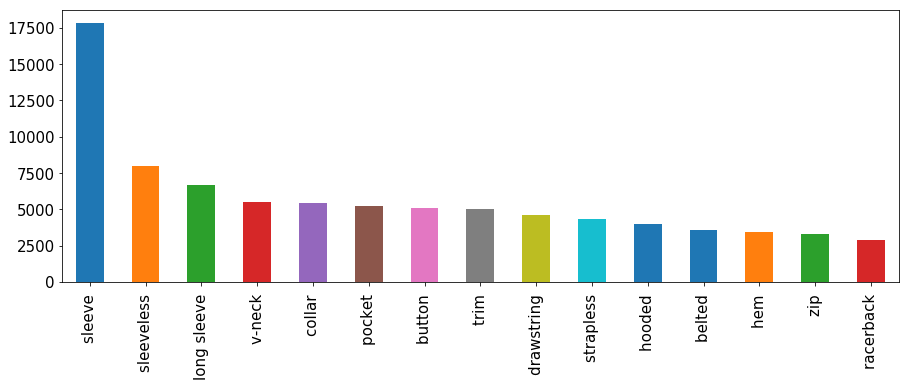

In [66]:
attr_part_frequency_sort[:15].plot(kind = 'bar', figsize=(15,5), fontsize = 15)

#### style

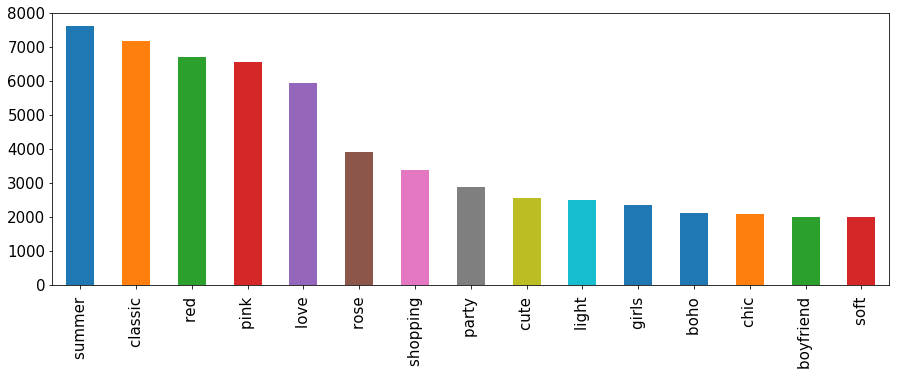

In [68]:
attr_style_frequency_sort[:15].plot(kind = 'bar', figsize=(15,5), fontsize = 15)

## Frequency of Attributes in top Category

In [110]:
df_attr_category_combined.head()

,image_name,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,...,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered,category_label,category_name,category_type
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,3,Blouse,1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,3,Blouse,1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,3,Blouse,1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,3,Blouse,1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,3,Blouse,1


In [119]:
df_attr_category_combined.drop(['image_name'], axis = 1).groupby('category_name').describe()

a-line                                               abstract   \
                 count      mean       std  min  25%  50%  75%  max     count   
category_name                                                                   
Anorak           160.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0     160.0   
Blazer          7495.0 -0.997598  0.069268 -1.0 -1.0 -1.0 -1.0  1.0    7495.0   
Blouse         24557.0 -0.997882  0.065044 -1.0 -1.0 -1.0 -1.0  1.0   24557.0   
Bomber           309.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0     309.0   
Button-Down      330.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0     330.0   
Caftan            54.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0      54.0   
Capris            77.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0      77.0   
Cardigan       13311.0 -0.998798  0.049018 -1.0 -1.0 -1.0 -1.0  1.0   13311.0   
Chinos           527.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0     527.0   
Coat            2120.0 -0.970755  0.240130 -1.0 -1.0 -1.0 -1.0  1.0    2120.0   
Coverup           17.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0      17.0   
Culottes         486.0 -0.995885  0.090722 -1.0 -1.0 -1.0 -1.0  1.0     486.0   
Cutoffs         1669.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0    1669.0   
Dress          72158.0 -0.938219  0.346045 -1.0 -1.0 -1.0 -1.0  1.0   72158.0   
Flannel          324.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0     324.0   
Gauchos           49.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0      49.0   
Halter            17.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0      17.0   
Henley           716.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0     716.0   
Hoodie          4048.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0    4048.0   
Jacket         10467.0 -0.997134  0.075661 -1.0 -1.0 -1.0 -1.0  1.0   10467.0   
Jeans           7076.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0    7076.0   
Jeggings         594.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0     594.0   
Jersey           748.0 -0.997326  0.073127 -1.0 -1.0 -1.0 -1.0  1.0     748.0   
Jodhpurs          45.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0      45.0   
Joggers         4416.0 -0.999094  0.042558 -1.0 -1.0 -1.0 -1.0  1.0    4416.0   
Jumpsuit        6153.0 -0.999350  0.036055 -1.0 -1.0 -1.0 -1.0  1.0    6153.0   
Kaftan           126.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0     126.0   
Kimono          2294.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0    2294.0   
Leggings        5013.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0    5013.0   
Onesie            70.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0      70.0   
Parka            676.0 -0.997041  0.076923 -1.0 -1.0 -1.0 -1.0  1.0     676.0   
Peacoat           97.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0      97.0   
Poncho           791.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0     791.0   
Robe             150.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0     150.0   
Romper          7408.0 -0.998110  0.061454 -1.0 -1.0 -1.0 -1.0  1.0    7408.0   
Sarong            32.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0      32.0   
Shorts         19666.0 -0.999390  0.034930 -1.0 -1.0 -1.0 -1.0  1.0   19666.0   
Skirt          14773.0 -0.883707  0.468057 -1.0 -1.0 -1.0 -1.0  1.0   14773.0   
Sweater        13123.0 -0.998781  0.049368 -1.0 -1.0 -1.0 -1.0  1.0   13123.0   
Sweatpants      3048.0 -0.999344  0.036226 -1.0 -1.0 -1.0 -1.0  1.0    3048.0   
Sweatshorts     1106.0 -0.998192  0.060138 -1.0 -1.0 -1.0 -1.0  1.0    1106.0   
Tank           15429.0 -0.998444  0.055757 -1.0 -1.0 -1.0 -1.0  1.0   15429.0   
Tee            36887.0 -0.999349  0.036068 -1.0 -1.0 -1.0 -1.0  1.0   36887.0   
Top            10078.0 -0.998214  0.059744 -1.0 -1.0 -1.0 -1.0  1.0   10078.0   
Trunks           386.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0     386.0   
Turtleneck       146.0 -1.000000  0.000000 -1.0 -1.0 -1.0 -1.0 -1.0     146.0   

                        ...  zipper       zip

In [148]:
df = df_attr_category_combined.groupby('category_name')

In [149]:
df_dress = df.get_group('Dress')

In [150]:
df_dress.head()

,image_name,a-line,abstract,abstract chevron,abstract chevron print,abstract diamond,abstract floral,abstract floral print,abstract geo,abstract geo print,...,zip,zip-front,zip-pocket,zip-up,zipped,zipper,zippered,category_label,category_name,category_type
198672,img/Open-Knit_High-Slit_Maxi_Dress/img_0000000...,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,41,Dress,3
198673,img/Open-Knit_High-Slit_Maxi_Dress/img_0000000...,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,41,Dress,3
198674,img/Open-Knit_High-Slit_Maxi_Dress/img_0000000...,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,41,Dress,3
198675,img/Open-Knit_High-Slit_Maxi_Dress/img_0000000...,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,41,Dress,3
198676,img/Open-Knit_High-Slit_Maxi_Dress/img_0000000...,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,41,Dress,3


In [192]:
dict_attr = {}

count_sum = 0

for attr in lst_attr:
    dict_attr[attr] = 0
    dict_attr[attr] = np.sum(df_dress[attr].values == 1)

    count_sum += np.sum(df_dress[attr].values == 1)
    
print(dict_attr)
print(count_sum)

{'a-line ': 2229, 'abstract ': 1822, 'abstract chevron ': 36, 'abstract chevron print ': 2, 'abstract diamond ': 18, 'abstract floral ': 200, 'abstract floral print ': 84, 'abstract geo ': 29, 'abstract geo print ': 5, 'abstract paisley ': 8, 'abstract pattern ': 53, 'abstract print ': 643, 'abstract printed ': 58, 'abstract stripe ': 48, 'acid ': 57, 'acid wash ': 45, 'americana ': 4, 'angeles ': 64, 'animal ': 292, 'animal print ': 192, 'ankle ': 84, 'applique ': 166, 'arrow collar ': 15, 'art ': 105, 'asymmetric ': 207, 'asymmetrical ': 242, 'asymmetrical hem ': 26, 'athletic ': 10, 'audrey ': 15, 'babe ': 25, 'babydoll ': 1165, 'back bow ': 20, 'back cutout ': 107, 'back knit ': 15, 'back lace ': 104, 'back striped ': 11, 'backless ': 757, 'baja ': 9, 'bandage ': 868, 'bandana ': 15, 'bandana print ': 10, 'barbie ': 8, 'baroque ': 465, 'baroque print ': 208, 'baseball ': 17, 'basic ': 133, 'basquiat ': 0, 'batwing ': 45, 'beach ': 628, 'bead ': 79, 'beaded ': 1399, 'beaded chiffon 

<BarContainer object of 15 artists>

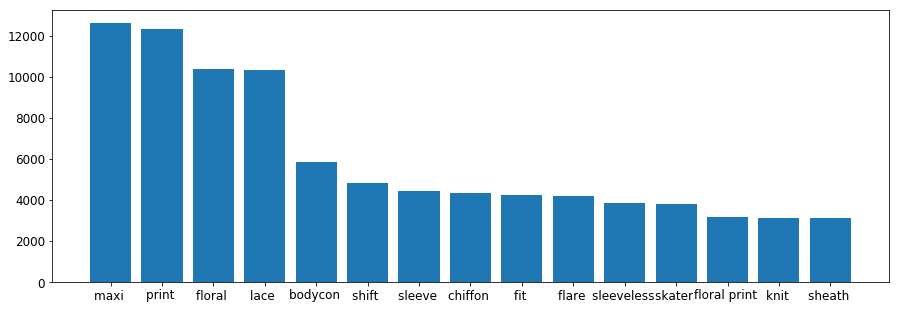

In [238]:

sorted_by_value = {k: v for k, v in sorted(dict_attr.items(), key=lambda kv: kv[1], reverse= True)}
sorted_by_value2 = {k: sorted_by_value[k] for k in list(sorted_by_value)[:15]}
plt.figure(figsize=(15,5))
plt.bar(sorted_by_value2.keys(), sorted_by_value2.values())